<a href="https://colab.research.google.com/github/wilstermanz/holbertonschool-machine_learning/blob/main/pipeline/pandas/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd

# 0. From Numpy

Write a function `def from_numpy(array):` that creates a `pd.DataFrame` from a `np.ndarray`:

* `array` is the `np.ndarray` from which you should create the `pd.DataFrame`
* The columns of the `pd.DataFrame` should be labeled in alphabetical order and capitalized. There will not be more than 26 columns.
* Returns: the newly created `pd.DataFrame`


In [61]:
def from_numpy(array):
    columns = [chr(ord('A') + i) for i in range(array.shape[1])]
    return pd.DataFrame(array, columns=columns)

In [62]:
np.random.seed(0)
A = np.random.randn(5, 8)
print(from_numpy(A))
B = np.random.randn(9, 3)
print(from_numpy(B))

          A         B         C         D         E         F         G  \
0  1.764052  0.400157  0.978738  2.240893  1.867558 -0.977278  0.950088   
1 -0.103219  0.410599  0.144044  1.454274  0.761038  0.121675  0.443863   
2  1.494079 -0.205158  0.313068 -0.854096 -2.552990  0.653619  0.864436   
3  2.269755 -1.454366  0.045759 -0.187184  1.532779  1.469359  0.154947   
4 -0.887786 -1.980796 -0.347912  0.156349  1.230291  1.202380 -0.387327   

          H  
0 -0.151357  
1  0.333674  
2 -0.742165  
3  0.378163  
4 -0.302303  
          A         B         C
0 -1.048553 -1.420018 -1.706270
1  1.950775 -0.509652 -0.438074
2 -1.252795  0.777490 -1.613898
3 -0.212740 -0.895467  0.386902
4 -0.510805 -1.180632 -0.028182
5  0.428332  0.066517  0.302472
6 -0.634322 -0.362741 -0.672460
7 -0.359553 -0.813146 -1.726283
8  0.177426 -0.401781 -1.630198


# 1. From Dictionary

Write a python script that created a `pd.DataFrame` from a dictionary:

* The first column should be labeled `First` and have the values `0.0`, `0.5`, `1.0`, and `1.5`
* The second column should be labeled `Second` and have the values `one`, `two`, `three`, `four`
* The rows should be labeled `A`, `B`, `C`, and `D`, respectively
The `pd.DataFrame` should be saved into the variable `df`


In [63]:
my_dict = {'First': [a / 2 for a in range(4)],
           'Second': ['one', 'two', 'three', 'four']}
# index = [chr(ord('A') + i) for i in range(my_dict.shape[1])]
df = pd.DataFrame(my_dict, index=['A', 'B', 'C', 'D'])
df

,First,Second
A,0.0,one
B,0.5,two
C,1.0,three
D,1.5,four


# 2. From File

Write a function `def from_file(filename, delimiter):` that loads data from a file as a `pd.DataFrame`:

* `filename` is the file to load from
* `delimiter` is the column separator
* Returns: the loaded `pd.DataFrame`


In [64]:
def from_file(filename, delimiter):
    return pd.read_table(filename, delimiter=delimiter)


In [65]:
df1 = from_file('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv', ',')
print(df1.head())
df2 = from_file('bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv', ',')
print(df2.tail())

    Timestamp   Open   High    Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1417411980  300.0  300.0  300.0  300.0          0.01                3.0   
1  1417412040    NaN    NaN    NaN    NaN           NaN                NaN   
2  1417412100    NaN    NaN    NaN    NaN           NaN                NaN   
3  1417412160    NaN    NaN    NaN    NaN           NaN                NaN   
4  1417412220    NaN    NaN    NaN    NaN           NaN                NaN   

   Weighted_Price  
0           300.0  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
          Timestamp     Open     High      Low    Close  Volume_(BTC)  \
4363452  1587513360  6847.97  6856.35  6847.97  6856.35      0.125174   
4363453  1587513420  6850.23  6856.13  6850.23  6850.89      1.224777   
4363454  1587513480  6846.50  6857.45  6846.02  6857.45      7.089168   
4363455  1587513540  6854.18  6854.98  6854.18  6854.98      0.012231   
4363456  1587513600  6850.60  6850.60  6850.60

# 3. Rename

Complete the script below to perform the following:

* Rename the column `Timestamp` to `Datetime`
* Convert the `timestamp` values to `datetime` values
* Display only the `Datetime` and `Close` columns


    $ cat 3-rename.py
    #!/usr/bin/env python3

    import pandas as pd
    from_file = __import__('2-from_file').from_file

    df = from_file('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv', ',')

    # YOUR CODE HERE

    print(df.tail())
    $ ./3-rename.py
                    Datetime    Close
    2099755 2019-01-07 22:02:00  4006.01
    2099756 2019-01-07 22:03:00  4006.01
    2099757 2019-01-07 22:04:00  4006.01
    2099758 2019-01-07 22:05:00  4005.50
    2099759 2019-01-07 22:06:00  4005.99
    $


In [66]:
df = from_file('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv', ',')

df.rename(columns={'Timestamp': 'Datetime'}, inplace=True)
df['Datetime'] = pd.to_datetime(df['Datetime'], unit='s')
df = df[['Datetime', 'Close']]

print(df.tail())

                   Datetime    Close
2099755 2019-01-07 22:02:00  4006.01
2099756 2019-01-07 22:03:00  4006.01
2099757 2019-01-07 22:04:00  4006.01
2099758 2019-01-07 22:05:00  4005.50
2099759 2019-01-07 22:06:00  4005.99


# 4. To Numpy

Complete the following script to take the last 10 rows of the columns `High` and `Close` and convert them into a `numpy.ndarray`:

    $ cat 4-array.py
    #!/usr/bin/env python3

    import pandas as pd
    from_file = __import__('2-from_file').from_file

    df = from_file('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv', ',')

    A = # YOUR CODE HERE

    print(A)
    $ ./4-array.py
    [[4009.54 4007.01]
    [4007.01 4003.49]
    [4007.29 4006.57]
    [4006.57 4006.56]
    [4006.57 4006.01]
    [4006.57 4006.01]
    [4006.57 4006.01]
    [4006.01 4006.01]
    [4006.01 4005.5 ]
    [4006.01 4005.99]]
    $



In [67]:
df = from_file('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv', ',')

A = df[['High', 'Close']].tail(10).to_numpy()

print(A)

[[4009.54 4007.01]
 [4007.01 4003.49]
 [4007.29 4006.57]
 [4006.57 4006.56]
 [4006.57 4006.01]
 [4006.57 4006.01]
 [4006.57 4006.01]
 [4006.01 4006.01]
 [4006.01 4005.5 ]
 [4006.01 4005.99]]


# 5. Slice

Complete the following script to slice the `pd.DataFrame` along the columns `High`, `Low`, `Close`, and `Volume_BTC`, taking every 60th row:

    $ cat 5-slice.py
    #!/usr/bin/env python3

    import pandas as pd
    from_file = __import__('2-from_file').from_file

    df = from_file('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv', ',')

    df = # YOUR CODE HERE

    print(df.tail())
    $ ./5-slice.py
                High      Low    Close  Volume_(BTC)
    2099460  4020.08  4020.07  4020.08      4.704989
    2099520  4020.94  4020.93  4020.94      2.111411
    2099580  4020.00  4019.01  4020.00      4.637035
    2099640  4017.00  4016.99  4017.00      2.362372
    2099700  4014.78  4013.50  4014.72      1.291557
    $



In [68]:
df = from_file('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv', ',')

df = df[['High', 'Low', 'Close', 'Volume_(BTC)']].iloc[::60]

print(df.tail())

            High      Low    Close  Volume_(BTC)
2099460  4020.08  4020.07  4020.08      4.704989
2099520  4020.94  4020.93  4020.94      2.111411
2099580  4020.00  4019.01  4020.00      4.637035
2099640  4017.00  4016.99  4017.00      2.362372
2099700  4014.78  4013.50  4014.72      1.291557


# 6. Flip it and Switch it

Complete the following script to alter the `pd.DataFrame` such that the rows and columns are transposed and the data is sorted in reverse chronological order:

    $ cat 6-flip_switch.py
    #!/usr/bin/env python3

    import pandas as pd
    from_file = __import__('2-from_file').from_file

    df = from_file('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv', ',')

    df = # YOUR CODE HERE

    print(df.tail(8))
    $ ./6-flip_switch.py
                            2099759       2099758       2099757  ...       2             1             0      
    Timestamp          1.546899e+09  1.546899e+09  1.546899e+09  ...  1.417412e+09  1.417412e+09  1.417412e+09
    Open               4.005510e+03  4.006010e+03  4.006010e+03  ...           NaN           NaN  3.000000e+02
    High               4.006010e+03  4.006010e+03  4.006010e+03  ...           NaN           NaN  3.000000e+02
    Low                4.005510e+03  4.005500e+03  4.006000e+03  ...           NaN           NaN  3.000000e+02
    Close              4.005990e+03  4.005500e+03  4.006010e+03  ...           NaN           NaN  3.000000e+02
    Volume_(BTC)       1.752778e+00  2.699700e+00  1.192123e+00  ...           NaN           NaN  1.000000e-02
    Volume_(Currency)  7.021184e+03  1.081424e+04  4.775647e+03  ...           NaN           NaN  3.000000e+00
    Weighted_Price     4.005746e+03  4.005720e+03  4.006004e+03  ...           NaN           NaN  3.000000e+02

    [8 rows x 2099760 columns]
    $



In [69]:
df = from_file('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv', ',')

df = df.T.sort_values('Timestamp', axis=1, ascending=False)

print(df.tail(8))

                        2099759       2099758       2099757       2099756  \
Timestamp          1.546899e+09  1.546899e+09  1.546899e+09  1.546899e+09   
Open               4.005510e+03  4.006010e+03  4.006010e+03  4.006010e+03   
High               4.006010e+03  4.006010e+03  4.006010e+03  4.006570e+03   
Low                4.005510e+03  4.005500e+03  4.006000e+03  4.006000e+03   
Close              4.005990e+03  4.005500e+03  4.006010e+03  4.006010e+03   
Volume_(BTC)       1.752778e+00  2.699700e+00  1.192123e+00  9.021637e-01   
Volume_(Currency)  7.021184e+03  1.081424e+04  4.775647e+03  3.614083e+03   
Weighted_Price     4.005746e+03  4.005720e+03  4.006004e+03  4.006017e+03   

                        2099755       2099754       2099753       2099752  \
Timestamp          1.546899e+09  1.546898e+09  1.546898e+09  1.546898e+09   
Open               4.006010e+03  4.006570e+03  4.006560e+03  4.003490e+03   
High               4.006570e+03  4.006570e+03  4.006570e+03  4.007290e+03  

# 7. Sort

Complete the following script to sort the `pd.DataFrame` by the `High` price in descending order:

    $ cat 7-high.py
    #!/usr/bin/env python3

    import pandas as pd
    from_file = __import__('2-from_file').from_file

    df = from_file('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv', ',')

    df = # YOUR CODE HERE

    print(df.head())
    $ ./7-high.py
            Timestamp      Open      High       Low     Close  Volume_(BTC)  Volume_(Currency)  Weighted_Price
    1543350  1513514220  19891.99  19891.99  19891.98  19891.98      3.323210       66105.250870    19891.984712
    1543352  1513514340  19891.99  19891.99  19891.98  19891.98      9.836946      195676.363110    19891.983294
    1543351  1513514280  19891.99  19891.99  19891.98  19891.98      8.172155      162560.403740    19891.987528
    1543349  1513514160  19891.00  19891.99  19890.99  19891.99      1.336512       26584.930278    19891.272886
    1543353  1513514400  19891.99  19891.99  19876.22  19884.99     19.925151      396292.881750    19889.078007
    $



In [70]:
df = from_file('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv', ',')

df = df.sort_values('High', ascending=False)

print(df.head())

          Timestamp      Open      High       Low     Close  Volume_(BTC)  \
1543350  1513514220  19891.99  19891.99  19891.98  19891.98      3.323210   
1543352  1513514340  19891.99  19891.99  19891.98  19891.98      9.836946   
1543351  1513514280  19891.99  19891.99  19891.98  19891.98      8.172155   
1543349  1513514160  19891.00  19891.99  19890.99  19891.99      1.336512   
1543353  1513514400  19891.99  19891.99  19876.22  19884.99     19.925151   

         Volume_(Currency)  Weighted_Price  
1543350       66105.250870    19891.984712  
1543352      195676.363110    19891.983294  
1543351      162560.403740    19891.987528  
1543349       26584.930278    19891.272886  
1543353      396292.881750    19889.078007  


# 8. Prune

Complete the following script to remove the entries in the `pd.DataFrame` where `Close` is `NaN`:

    $ cat 8-prune.py
    #!/usr/bin/env python3

    import pandas as pd
    from_file = __import__('2-from_file').from_file

    df = from_file('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv', ',')

    df = # YOUR CODE HERE

    print(df.head())
    $ ./8-prune.py
        Timestamp   Open   High    Low  Close  Volume_(BTC)  Volume_(Currency)  Weighted_Price
    0     1417411980  300.0  300.0  300.0  300.0      0.010000            3.00000           300.0
    7     1417412400  300.0  300.0  300.0  300.0      0.010000            3.00000           300.0
    51    1417415040  370.0  370.0  370.0  370.0      0.010000            3.70000           370.0
    77    1417416600  370.0  370.0  370.0  370.0      0.026556            9.82555           370.0
    1436  1417498140  377.0  377.0  377.0  377.0      0.010000            3.77000           377.0
    $



In [71]:
df = from_file('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv', ',')

df = df.loc[df['Close'].isnull() == False]

print(df.head())

       Timestamp   Open   High    Low  Close  Volume_(BTC)  Volume_(Currency)  \
0     1417411980  300.0  300.0  300.0  300.0      0.010000            3.00000   
7     1417412400  300.0  300.0  300.0  300.0      0.010000            3.00000   
51    1417415040  370.0  370.0  370.0  370.0      0.010000            3.70000   
77    1417416600  370.0  370.0  370.0  370.0      0.026556            9.82555   
1436  1417498140  377.0  377.0  377.0  377.0      0.010000            3.77000   

      Weighted_Price  
0              300.0  
7              300.0  
51             370.0  
77             370.0  
1436           377.0  


# 9. Fill

Complete the following script to fill in the missing data points in the `pd.DataFrame`:

* The column `Weighted_Price` should be removed
* missing values in `Close` should be set to the previous row value
* missing values in `High`, `Low`, `Open` should be set to the same row's `Close` value
* missing values in `Volume_(BTC)` and `Volume_(Currency)` should be set to `0`


    $ cat 9-fill.py
    #!/usr/bin/env python3

    import pandas as pd
    from_file = __import__('2-from_file').from_file

    df = from_file('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv', ',')

    # YOUR CODE HERE

    print(df.head())
    print(df.tail())
    $ ./9-fill.py
    Timestamp   Open   High    Low  Close  Volume_(BTC)  Volume_(Currency)
    0  1.417412e+09  300.0  300.0  300.0  300.0          0.01                3.0
    1  1.417412e+09  300.0  300.0  300.0  300.0          0.00                0.0
    2  1.417412e+09  300.0  300.0  300.0  300.0          0.00                0.0
    3  1.417412e+09  300.0  300.0  300.0  300.0          0.00                0.0
    4  1.417412e+09  300.0  300.0  300.0  300.0          0.00                0.0
    Timestamp     Open     High      Low    Close  Volume_(BTC)  Volume_(Currency)
    2099755  1.546899e+09  4006.01  4006.57  4006.00  4006.01      3.382954       13553.433078
    2099756  1.546899e+09  4006.01  4006.57  4006.00  4006.01      0.902164        3614.083169
    2099757  1.546899e+09  4006.01  4006.01  4006.00  4006.01      1.192123        4775.647308
    2099758  1.546899e+09  4006.01  4006.01  4005.50  4005.50      2.699700       10814.241898
    2099759  1.546899e+09  4005.51  4006.01  4005.51  4005.99      1.752778        7021.183546
    $



In [85]:
df = from_file('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv', ',')

df.drop('Weighted_Price', axis=1, inplace=True)
df['Close'].fillna(method='ffill', inplace=True)
df['High'].fillna(df['Close'], inplace=True)
df['Low'].fillna(df['Close'], inplace=True)
df['Open'].fillna(df['Close'], inplace=True)
df['Volume_(BTC)'].fillna(0, inplace=True)
df['Volume_(Currency)'].fillna(0, inplace=True)

print(df.head())
print(df.tail())

    Timestamp   Open   High    Low  Close  Volume_(BTC)  Volume_(Currency)
0  1417411980  300.0  300.0  300.0  300.0          0.01                3.0
1  1417412040  300.0  300.0  300.0  300.0          0.00                0.0
2  1417412100  300.0  300.0  300.0  300.0          0.00                0.0
3  1417412160  300.0  300.0  300.0  300.0          0.00                0.0
4  1417412220  300.0  300.0  300.0  300.0          0.00                0.0
          Timestamp     Open     High      Low    Close  Volume_(BTC)  \
2099755  1546898520  4006.01  4006.57  4006.00  4006.01      3.382954   
2099756  1546898580  4006.01  4006.57  4006.00  4006.01      0.902164   
2099757  1546898640  4006.01  4006.01  4006.00  4006.01      1.192123   
2099758  1546898700  4006.01  4006.01  4005.50  4005.50      2.699700   
2099759  1546898760  4005.51  4006.01  4005.51  4005.99      1.752778   

         Volume_(Currency)  
2099755       13553.433078  
2099756        3614.083168  
2099757        4775.6473

# 10. Indexing

Complete the following script to index the `pd.DataFrame` on the `Timestamp` column:

    $ cat 10-index.py
    #!/usr/bin/env python3

    import pandas as pd
    from_file = __import__('2-from_file').from_file

    df = from_file('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv', ',')

    df = # YOUR CODE HERE

    print(df.tail())
    $ ./10-index.py
                Open     High      Low    Close  Volume_(BTC)  Volume_(Currency)  Weighted_Price
    Timestamp                                                                                      
    1546898520  4006.01  4006.57  4006.00  4006.01      3.382954       13553.433078     4006.390309
    1546898580  4006.01  4006.57  4006.00  4006.01      0.902164        3614.083169     4006.017233
    1546898640  4006.01  4006.01  4006.00  4006.01      1.192123        4775.647308     4006.003635
    1546898700  4006.01  4006.01  4005.50  4005.50      2.699700       10814.241898     4005.719991
    1546898760  4005.51  4006.01  4005.51  4005.99      1.752778        7021.183546     4005.745614
    $

In [86]:
df = from_file('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv', ',')

df = df.set_index('Timestamp')

print(df.tail())

               Open     High      Low    Close  Volume_(BTC)  \
Timestamp                                                      
1546898520  4006.01  4006.57  4006.00  4006.01      3.382954   
1546898580  4006.01  4006.57  4006.00  4006.01      0.902164   
1546898640  4006.01  4006.01  4006.00  4006.01      1.192123   
1546898700  4006.01  4006.01  4005.50  4005.50      2.699700   
1546898760  4005.51  4006.01  4005.51  4005.99      1.752778   

            Volume_(Currency)  Weighted_Price  
Timestamp                                      
1546898520       13553.433078     4006.390309  
1546898580        3614.083168     4006.017232  
1546898640        4775.647308     4006.003635  
1546898700       10814.241898     4005.719991  
1546898760        7021.183546     4005.745614  


# 11. Concat

Complete the following script to index the `pd.DataFrames` on the `Timestamp` columns and concatenate them:

* Concatenate the start of the bitstamp table onto the top of the coinbase table
* Include all timestamps from bitstamp up to and including timestamp `1417411920`
* Add keys to the data labeled `bitstamp` and `coinbase` respectively


    $ cat 11-concat.py
    #!/usr/bin/env python3

    import pandas as pd
    from_file = __import__('2-from_file').from_file

    df1 = from_file('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv', ',')
    df2 = from_file('bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv', ',')

    # YOUR CODE HERE

    df = # YOUR CODE HERE

    print(df)
    $ ./11-concat.py
                            Open     High      Low    Close  Volume_(BTC)  Volume_(Currency)  Weighted_Price
            Timestamp                                                                                      
    bitstamp 1325317920     4.39     4.39     4.39     4.39      0.455581           2.000000        4.390000
            1325317980      NaN      NaN      NaN      NaN           NaN                NaN             NaN
            1325318040      NaN      NaN      NaN      NaN           NaN                NaN             NaN
            1325318100      NaN      NaN      NaN      NaN           NaN                NaN             NaN
            1325318160      NaN      NaN      NaN      NaN           NaN                NaN             NaN
            1325318220      NaN      NaN      NaN      NaN           NaN                NaN             NaN
            1325318280      NaN      NaN      NaN      NaN           NaN                NaN             NaN
            1325318340      NaN      NaN      NaN      NaN           NaN                NaN             NaN
            1325318400      NaN      NaN      NaN      NaN           NaN                NaN             NaN
            1325318460      NaN      NaN      NaN      NaN           NaN                NaN             NaN
            1325318520      NaN      NaN      NaN      NaN           NaN                NaN             NaN
            1325318580      NaN      NaN      NaN      NaN           NaN                NaN             NaN
            1325318640      NaN      NaN      NaN      NaN           NaN                NaN             NaN
            1325318700      NaN      NaN      NaN      NaN           NaN                NaN             NaN
            1325318760      NaN      NaN      NaN      NaN           NaN                NaN             NaN
            1325318820      NaN      NaN      NaN      NaN           NaN                NaN             NaN
            1325318880      NaN      NaN      NaN      NaN           NaN                NaN             NaN
            1325318940      NaN      NaN      NaN      NaN           NaN                NaN             NaN
            1325319000      NaN      NaN      NaN      NaN           NaN                NaN             NaN
            1325319060      NaN      NaN      NaN      NaN           NaN                NaN             NaN
            1325319120      NaN      NaN      NaN      NaN           NaN                NaN             NaN
            1325319180      NaN      NaN      NaN      NaN           NaN                NaN             NaN
            1325319240      NaN      NaN      NaN      NaN           NaN                NaN             NaN
            1325319300      NaN      NaN      NaN      NaN           NaN                NaN             NaN
            1325319360      NaN      NaN      NaN      NaN           NaN                NaN             NaN
            1325319420      NaN      NaN      NaN      NaN           NaN                NaN             NaN
            1325319480      NaN      NaN      NaN      NaN           NaN                NaN             NaN
            1325319540      NaN      NaN      NaN      NaN           NaN                NaN             NaN
            1325319600      NaN      NaN      NaN      NaN           NaN                NaN             NaN
            1325319660      NaN      NaN      NaN      NaN           NaN                NaN             NaN
    ...                      ...      ...      ...      ...           ...                ...             ...
    coinbase 1546897020  4011.51  4011.51  4011.50  4011.51      4.800442       19257.017170     4011.508983
            1546897080  4011.51  4011.51  4011.50  4011.50      2.564290       10286.657789     4011.503219
            1546897140  4011.51  4013.45  4011.50  4013.45     12.323814       49446.144604     4012.243570
            1546897200  4013.45  4015.00  4013.44  4015.00     13.981753       56123.805701     4014.075072
            1546897260  4015.00  4016.50  4015.00  4015.80      3.749535       15057.021696     4015.703679
            1546897320  4015.80  4015.80  4015.79  4015.79      1.856575        7455.632556     4015.799068
            1546897380  4015.80  4015.80  4015.79  4015.79      3.935866       15805.631118     4015.794631
            1546897440  4015.80  4015.80  4013.18  4014.64     14.744987       59208.462922     4015.497845
            1546897500  4014.65  4018.30  4014.64  4018.05     10.469356       42054.587908     4016.922240
            1546897560  4018.02  4018.11  4014.70  4014.87      4.673189       18768.274910     4016.160149
            1546897620  4014.90  4015.89  4014.90  4015.74      4.222425       16956.060548     4015.716607
            1546897680  4015.74  4015.74  4014.64  4014.64      8.378448       33644.339692     4015.581163
            1546897740  4014.65  4014.65  4014.64  4014.65      1.846774        7414.138808     4014.643943
            1546897800  4014.65  4014.65  4010.96  4012.40      7.349811       29490.133335     4012.366127
            1546897860  4012.40  4012.40  4010.04  4010.13      4.909604       19694.778769     4011.479901
            1546897920  4011.38  4012.40  4010.44  4010.72      4.804125       19272.037632     4011.560673
            1546897980  4010.73  4010.74  4010.00  4010.74     13.043658       52313.110686     4010.616565
            1546898040  4010.72  4011.00  4009.95  4010.75      5.149147       20650.628292     4010.495240
            1546898100  4010.71  4011.22  4009.67  4010.29      5.688910       22814.904034     4010.417799
            1546898160  4010.81  4010.81  4009.54  4009.54      1.307076        5241.132727     4009.813694
            1546898220  4009.54  4009.54  4007.00  4007.01      4.540920       18199.978249     4007.993430
            1546898280  4007.00  4007.01  4000.24  4003.49      9.452163       37845.755391     4003.925395
            1546898340  4003.49  4007.29  4003.49  4006.57     11.838284       47417.543200     4005.440599
            1546898400  4006.56  4006.57  4006.56  4006.56      8.475772       33958.700070     4006.561247
            1546898460  4006.57  4006.57  4006.00  4006.01      6.951222       27849.509219     4006.419421
            1546898520  4006.01  4006.57  4006.00  4006.01      3.382954       13553.433078     4006.390309
            1546898580  4006.01  4006.57  4006.00  4006.01      0.902164        3614.083169     4006.017233
            1546898640  4006.01  4006.01  4006.00  4006.01      1.192123        4775.647308     4006.003635
            1546898700  4006.01  4006.01  4005.50  4005.50      2.699700       10814.241898     4005.719991
            1546898760  4005.51  4006.01  4005.51  4005.99      1.752778        7021.183546     4005.745614
    $



In [91]:
df1 = from_file('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv', ',')
df2 = from_file('bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv', ',')

df1 = df1.set_index('Timestamp')
df2 = df2.set_index('Timestamp')

df = pd.concat([df2, df1], axis=0, keys=['bitstamp', 'coinbase'])

print(df)

                        Open     High      Low    Close  Volume_(BTC)  \
         Timestamp                                                      
bitstamp 1325317920     4.39     4.39     4.39     4.39      0.455581   
         1325317980      NaN      NaN      NaN      NaN           NaN   
         1325318040      NaN      NaN      NaN      NaN           NaN   
         1325318100      NaN      NaN      NaN      NaN           NaN   
         1325318160      NaN      NaN      NaN      NaN           NaN   
...                      ...      ...      ...      ...           ...   
coinbase 1546898520  4006.01  4006.57  4006.00  4006.01      3.382954   
         1546898580  4006.01  4006.57  4006.00  4006.01      0.902164   
         1546898640  4006.01  4006.01  4006.00  4006.01      1.192123   
         1546898700  4006.01  4006.01  4005.50  4005.50      2.699700   
         1546898760  4005.51  4006.01  4005.51  4005.99      1.752778   

                     Volume_(Currency)  Weighted_P

# 12. Hierarchy

Based on `11-concat.py`, rearrange the MultiIndex levels such that timestamp is the first level:

* Concatenate the `bitstamp` and `coinbase` tables from timestamps `1417411980` to `1417417980`, inclusive
* Add keys to the data labeled `bitstamp` and `coinbase` respectively
* Display the rows in chronological order


    $ cat 12-hierarchy.py
    #!/usr/bin/env python3

    import pandas as pd
    from_file = __import__('2-from_file').from_file

    df1 = from_file('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv', ',')
    df2 = from_file('bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv', ',')

    # YOUR CODE HERE

    df = # YOUR CODE HERE

    print(df)
    $ ./12-hierarchy.py
                        Open    High     Low   Close  Volume_(BTC)  Volume_(Currency)  Weighted_Price
    Timestamp                                                                                           
    1417411980 bitstamp  379.99  380.00  379.99  380.00      3.901265        1482.461708      379.995162
            coinbase  300.00  300.00  300.00  300.00      0.010000           3.000000      300.000000
    1417412040 bitstamp  380.00  380.00  380.00  380.00     35.249895       13394.959997      380.000000
            coinbase     NaN     NaN     NaN     NaN           NaN                NaN             NaN
    1417412100 bitstamp  380.00  380.00  380.00  380.00      3.712000        1410.560000      380.000000
            coinbase     NaN     NaN     NaN     NaN           NaN                NaN             NaN
    1417412160 bitstamp  379.93  380.00  379.93  380.00     13.451000        5111.297890      379.993896
            coinbase     NaN     NaN     NaN     NaN           NaN                NaN             NaN
    1417412220 bitstamp  380.00  380.00  380.00  380.00      1.693000         643.340000      380.000000
            coinbase     NaN     NaN     NaN     NaN           NaN                NaN             NaN
    1417412280 bitstamp  380.00  380.00  379.99  379.99      1.771000         672.978100      379.998927
            coinbase     NaN     NaN     NaN     NaN           NaN                NaN             NaN
    1417412340 bitstamp  379.93  379.93  379.93  379.93      0.034500          13.107585      379.930000
            coinbase     NaN     NaN     NaN     NaN           NaN                NaN             NaN
    1417412400 bitstamp  379.94  380.15  379.94  380.15     14.967000        5688.020008      380.037416
            coinbase  300.00  300.00  300.00  300.00      0.010000           3.000000      300.000000
    1417412460 bitstamp  379.94  380.15  379.94  380.15      2.433510         924.686531      379.980576
            coinbase     NaN     NaN     NaN     NaN           NaN                NaN             NaN
    1417412520 bitstamp  380.15  380.15  380.15  380.15      0.120000          45.618000      380.150000
            coinbase     NaN     NaN     NaN     NaN           NaN                NaN             NaN
    1417412580 bitstamp  379.98  379.98  379.92  379.92      4.394971        1669.801477      379.934562
            coinbase     NaN     NaN     NaN     NaN           NaN                NaN             NaN
    1417412640 bitstamp     NaN     NaN     NaN     NaN           NaN                NaN             NaN
            coinbase     NaN     NaN     NaN     NaN           NaN                NaN             NaN
    1417412700 bitstamp  379.92  379.92  379.92  379.92      0.014704           5.586477      379.920000
            coinbase     NaN     NaN     NaN     NaN           NaN                NaN             NaN
    1417412760 bitstamp  379.90  379.90  379.24  379.24      2.947739        1119.550546      379.799751
            coinbase     NaN     NaN     NaN     NaN           NaN                NaN             NaN
    1417412820 bitstamp  379.24  379.24  379.24  379.24      2.623738         995.026236      379.240000
            coinbase     NaN     NaN     NaN     NaN           NaN                NaN             NaN
    ...                     ...     ...     ...     ...           ...                ...             ...
    1417417140 bitstamp  380.69  380.70  378.98  380.70      3.693000        1403.340503      380.000136
            coinbase     NaN     NaN     NaN     NaN           NaN                NaN             NaN
    1417417200 bitstamp  380.70  380.70  379.00  380.70      2.159118         820.275987      379.912464
            coinbase     NaN     NaN     NaN     NaN           NaN                NaN             NaN
    1417417260 bitstamp  380.70  380.70  380.70  380.70      1.693000         644.525100      380.700000
            coinbase     NaN     NaN     NaN     NaN           NaN                NaN             NaN
    1417417320 bitstamp  380.69  380.69  380.67  380.67      0.791000         301.119990      380.682668
            coinbase     NaN     NaN     NaN     NaN           NaN                NaN             NaN
    1417417380 bitstamp  380.09  380.09  380.09  380.09      0.190000          72.217100      380.090000
            coinbase     NaN     NaN     NaN     NaN           NaN                NaN             NaN
    1417417440 bitstamp  380.09  380.10  380.09  380.10      1.340000         509.324500      380.092910
            coinbase     NaN     NaN     NaN     NaN           NaN                NaN             NaN
    1417417500 bitstamp  380.10  380.10  379.03  380.10      1.102000         418.763200      380.002904
            coinbase     NaN     NaN     NaN     NaN           NaN                NaN             NaN
    1417417560 bitstamp  380.10  380.10  380.10  380.10      0.501000         190.430100      380.100000
            coinbase     NaN     NaN     NaN     NaN           NaN                NaN             NaN
    1417417620 bitstamp     NaN     NaN     NaN     NaN           NaN                NaN             NaN
            coinbase     NaN     NaN     NaN     NaN           NaN                NaN             NaN
    1417417680 bitstamp  380.08  380.08  380.08  380.08      1.120305         425.805600      380.080000
            coinbase     NaN     NaN     NaN     NaN           NaN                NaN             NaN
    1417417740 bitstamp  379.03  380.06  378.61  380.06      3.237000        1226.650026      378.946564
            coinbase     NaN     NaN     NaN     NaN           NaN                NaN             NaN
    1417417800 bitstamp  380.07  380.10  378.02  380.08     17.092000        6471.461319      378.625165
            coinbase     NaN     NaN     NaN     NaN           NaN                NaN             NaN
    1417417860 bitstamp  378.75  380.09  378.04  380.09      7.523000        2847.248452      378.472478
            coinbase     NaN     NaN     NaN     NaN           NaN                NaN             NaN
    1417417920 bitstamp  380.09  380.10  380.09  380.10      1.503000         571.285290      380.096667
            coinbase     NaN     NaN     NaN     NaN           NaN                NaN             NaN
    1417417980 bitstamp  380.10  380.10  378.85  378.85     26.599796       10079.364182      378.926376
            coinbase     NaN     NaN     NaN     NaN           NaN                NaN             NaN

    [202 rows x 7 columns]
    $



In [108]:
df1 = from_file('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv', ',')
df2 = from_file('bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv', ',')

df1 = df1.set_index('Timestamp').loc[1417411980:1417417981]
df2 = df2.set_index('Timestamp').loc[1417411980:1417417981]

df = pd.concat([df2, df1], axis=0, keys=['bitstamp', 'coinbase']).swaplevel(0, 1).sort_index()

print(df)

                       Open   High     Low   Close  Volume_(BTC)  \
Timestamp                                                          
1417411980 bitstamp  379.99  380.0  379.99  380.00      3.901265   
           coinbase  300.00  300.0  300.00  300.00      0.010000   
1417412040 bitstamp  380.00  380.0  380.00  380.00     35.249895   
           coinbase     NaN    NaN     NaN     NaN           NaN   
1417412100 bitstamp  380.00  380.0  380.00  380.00      3.712000   
...                     ...    ...     ...     ...           ...   
1417417860 coinbase     NaN    NaN     NaN     NaN           NaN   
1417417920 bitstamp  380.09  380.1  380.09  380.10      1.503000   
           coinbase     NaN    NaN     NaN     NaN           NaN   
1417417980 bitstamp  380.10  380.1  378.85  378.85     26.599796   
           coinbase     NaN    NaN     NaN     NaN           NaN   

                     Volume_(Currency)  Weighted_Price  
Timestamp                                               
1

# 13. Analyze

Complete the following script to calculate descriptive statistics for all columns in `pd.DataFrame` except `Timestamp`:

    $ cat 13-analyze.py
    #!/usr/bin/env python3

    import pandas as pd
    from_file = __import__('2-from_file').from_file

    df = from_file('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv', ',')

    stats = # YOUR CODE HERE

    print(stats)
    $ ./13-analyze.py
                Open          High           Low         Close  Volume_(BTC)  Volume_(Currency)  Weighted_Price
    count  1.990691e+06  1.990691e+06  1.990691e+06  1.990691e+06  1.990691e+06       1.990691e+06    1.990691e+06
    mean   3.246403e+03  3.247829e+03  3.244856e+03  3.246403e+03  7.849139e+00       3.600157e+04    3.246341e+03
    std    3.799154e+03  3.801394e+03  3.796761e+03  3.799150e+03  1.873222e+01       1.401879e+05    3.799078e+03
    min    6.000000e-02  6.000000e-02  6.000000e-02  6.000000e-02  1.000000e-08       2.641700e-06    6.000000e-02
    25%    4.195800e+02  4.196400e+02  4.195000e+02  4.195700e+02  9.024000e-01       6.440031e+02    4.195645e+02
    50%    1.014580e+03  1.014890e+03  1.014150e+03  1.014530e+03  2.692900e+00       3.695642e+03    1.014512e+03
    75%    6.322630e+03  6.324010e+03  6.321090e+03  6.322670e+03  7.600965e+00       1.972392e+04    6.322550e+03
    max    1.989199e+04  1.989199e+04  1.989198e+04  1.989199e+04  1.563267e+03       1.997076e+07    1.989199e+04
    $



In [110]:
df = from_file('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv', ',')

stats = df.drop('Timestamp', axis=1).describe()

print(stats)

               Open          High           Low         Close  Volume_(BTC)  \
count  1.990691e+06  1.990691e+06  1.990691e+06  1.990691e+06  1.990691e+06   
mean   3.246403e+03  3.247829e+03  3.244856e+03  3.246403e+03  7.849139e+00   
std    3.799154e+03  3.801394e+03  3.796761e+03  3.799150e+03  1.873222e+01   
min    6.000000e-02  6.000000e-02  6.000000e-02  6.000000e-02  1.000000e-08   
25%    4.195800e+02  4.196400e+02  4.195000e+02  4.195700e+02  9.024000e-01   
50%    1.014580e+03  1.014890e+03  1.014150e+03  1.014530e+03  2.692900e+00   
75%    6.322630e+03  6.324010e+03  6.321090e+03  6.322670e+03  7.600965e+00   
max    1.989199e+04  1.989199e+04  1.989198e+04  1.989199e+04  1.563267e+03   

       Volume_(Currency)  Weighted_Price  
count       1.990691e+06    1.990691e+06  
mean        3.600157e+04    3.246341e+03  
std         1.401879e+05    3.799078e+03  
min         2.641700e-06    6.000000e-02  
25%         6.440031e+02    4.195645e+02  
50%         3.695642e+03    1.

# 14. Visualize

Complete the following script to visualize the `pd.DataFrame`:

* The column `Weighted_Price` should be removed
* Rename the column `Timestamp` to `Date`
* Convert the `timestamp` values to `date` values
* Index the data frame on `Date`
* Missing values in `Close` should be set to the previous row value
* Missing values in `High`, `Low`, `Open` should be set to the same row's `Close` value
* Missing values in `Volume_(BTC)` and `Volume_(Currency)` should be set to `0`
* Plot the data from 2017 and beyond at daily intervals and group the values of the same day such that:
    * `High`: max
    * `Low`: min
    * `Open`: mean
    * `Close`: mean
    * `Volume(BTC)`: sum
    * `Volume(Currency)`: sum


    $ cat 14-visualize.py
    #!/usr/bin/env python3

    from datetime import date
    import matplotlib.pyplot as plt
    import pandas as pd
    from_file = __import__('2-from_file').from_file

    df = from_file('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv', ',')

    # YOUR CODE HERE

    $ ./14-visualize.py


<ipython-input-217-510adbc4e51e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'].fillna(method='ffill', inplace=True)
<ipython-input-217-510adbc4e51e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['High'].fillna(df['Close'], inplace=True)
<ipython-input-217-510adbc4e51e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Low'].fillna(df['Close'], inplace=True)
<ipython-input-217-510adbc4e51e>:16: SettingWithCopy

<Axes: xlabel='Date'>

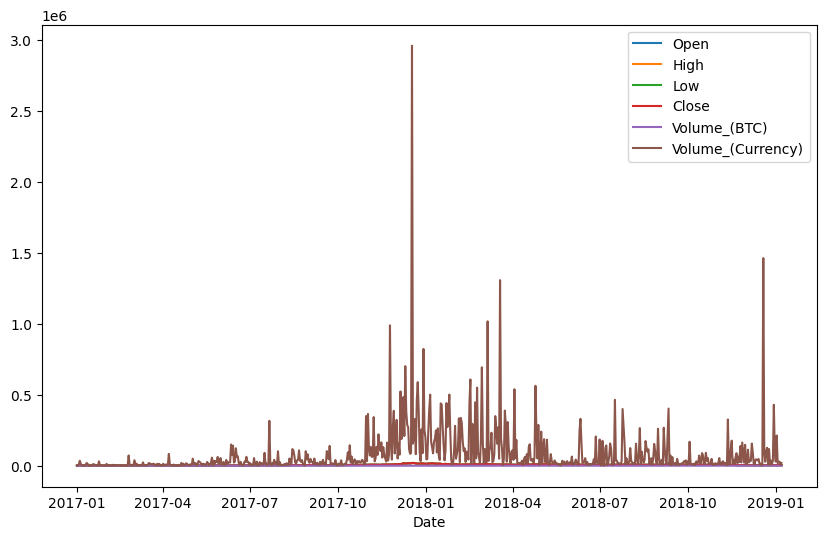

In [217]:
from datetime import date
import matplotlib.pyplot as plt

df = from_file('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv', ',')

df.drop('Weighted_Price', axis=1, inplace=True)

df.rename({'Timestamp': 'Date'}, axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], unit='s').dt.date
df.set_index('Date', inplace=True)
df = df[df.index >= date(2017, 1, 1)]

df['Close'].fillna(method='ffill', inplace=True)
df['High'].fillna(df['Close'], inplace=True)
df['Low'].fillna(df['Close'], inplace=True)
df['Open'].fillna(df['Close'], inplace=True)
df['Volume_(BTC)'].fillna(0, inplace=True)
df['Volume_(Currency)'].fillna(0, inplace=True)

df.iloc[::1440, :].plot(figsize=(10, 6))

In [214]:
df = df.groupby(axis=0, level=0).agg(['min', 'max', 'mean', 'sum'])
df

Open                                       High           \
                min      max         mean         sum      min      max   
Date                                                                      
2017-01-01   964.66  1000.00   979.546833  1410547.44   964.66  1000.00   
2017-01-02   991.18  1033.99  1013.108889  1458876.80   991.34  1034.39   
2017-01-03  1008.08  1036.99  1019.497944  1468077.04  1008.98  1036.99   
2017-01-04  1019.81  1146.09  1082.870194  1559333.08  1023.12  1147.00   
2017-01-05   885.01  1171.99  1056.222931  1520961.02   891.91  1175.00   
...             ...      ...          ...         ...      ...      ...   
2019-01-03  3763.77  3892.92  3829.991333  5515187.52  3765.50  3893.80   
2019-01-04  3733.79  3849.00  3785.379042  5450945.82  3742.90  3849.00   
2019-01-05  3777.10  3866.19  3834.627896  5521864.17  3785.10  3874.12   
2019-01-06  3772.02  4078.39  3874.269319  5578947.82  3780.00  4088.00   
2019-01-07  3972.98  4070.00  4025.103866  5341312.83  3981.31  4070.00   

                                         Low           ...        Close  \
                   mean         sum      min      max  ...         mean   
Date                                                   ...                
2017-01-01   979.668014  1410721.94   964.37  1000.00  ...   979.547736   
2017-01-02  1013.519771  1459468.47   990.52  1033.90  ...  1013.123771   
2017-01-03  1019.879299  1468626.19  1006.71  1036.98  ...  1019.524174   
2017-01-04  1083.605299  1560391.63  1018.00  1145.67  ...  1083.022799   
2017-01-05  1057.899667  1523375.52   880.00  1171.16  ...  1056.177729   
...                 ...         ...      ...      ...  ...          ...   
2019-01-03  3830.601222  5516065.76  3758.07  3891.72  ...  3829.922118   
2019-01-04  3786.126722  5452022.48  3730.00  3847.47  ...  3785.405590   
2019-01-05  3835.344944  5522896.72  3775.00  3859.75  ...  3834.609424   
2019-01-06  3875.260993  5580375.83  3756.01  4066.25  ...  3874.451625   
2019-01-07  4025.949812  5342435.40  3968.79  4061.65  ...  4025.089887   

                       Volume_(BTC)                                       \
                   sum          min         max       mean           sum   
Date                                                                       
2017-01-01  1410548.74     0.000000   55.276198   3.070488   4421.502883   
2017-01-02  1458898.23     0.000000  135.835457   5.363636   7723.635752   
2017-01-03  1468114.81     0.000000   97.000651   5.982819   8615.260058   
2017-01-04  1559552.83     0.000000  340.495575  11.265438  16222.230267   
2017-01-05  1520895.93     0.000000  301.250017  14.198893  20446.405615   
...                ...          ...         ...        ...           ...   
2019-01-03  5515087.85     0.020000  364.570839   6.139066   8840.254922   
2019-01-04  5450984.05     0.050940  256.337882   6.215354   8950.110359   
2019-01-05  5521837.57     0.032317   92.794782   4.206899   6057.934757   
2019-01-06  5579210.34     0.017110  722.719172   6.601576   9506.268897   
2019-01-07  5341294.28     0.022905  353.459575   6.689328   8876.737621   

           Volume_(Currency)                                            
                         min           max          mean           sum  
Date                                                                    
2017-01-01          0.000000  5.444522e+04   3026.890703  4.358723e+06  
2017-01-02          0.000000  1.363286e+05   5428.108041  7.816476e+06  
2017-01-03          0.000000  9.947517e+04   6109.775754  8.798077e+06  
2017-01-04          0.000000  3.786951e+05  12277.277580  1.767928e+07  
2017-01-05          0.000000  3.044429e+05  14673.008010  2.112913e+07  
...                      ...           ...           ...           ...  
2019-01-03         76.650256  1.382536e+06  23488.491210  3.382343e+07  
2019-01-04        192.941115  9.755246e+05  23523.548116  3.387391e+07  
2019-01-05        124.023829  3.587794e+05  1

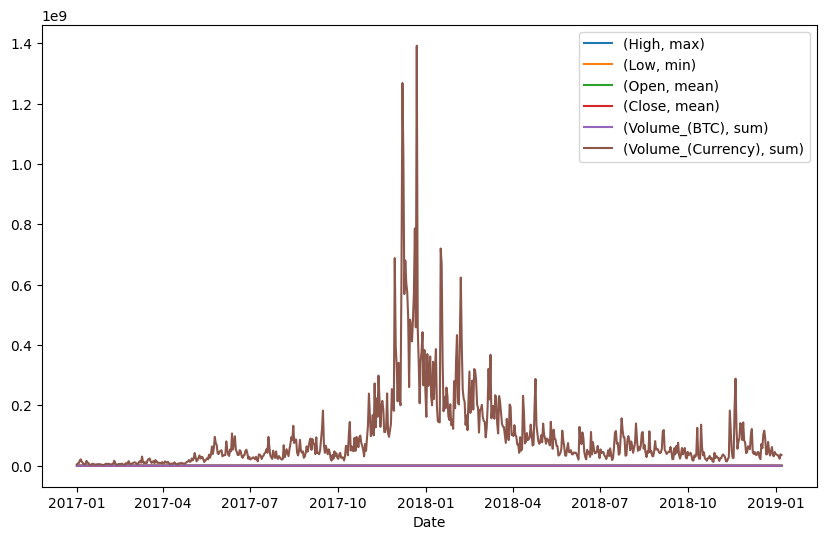

In [215]:
plt.figure(figsize=(10, 6))

df['High', 'max'].plot()
df['Low', 'min'].plot()
df['Open', 'mean'].plot()
df['Close', 'mean'].plot()
df['Volume_(BTC)', 'sum'].plot()
df['Volume_(Currency)', 'sum'].plot()

plt.legend()
plt.show()